# Uczenie nienadzorowane

Do tej pory zajmowaliśmy się uczeniem nadzorowanym (ang. *supervised*), tj. takimi przypadkami, gdy zbiór trenujący składał się z dwóch zmiennych `X` i `y`, a naszym zadaniem było przewidzenia `y` na podstawie danych z `X`. Ponadto poznaliśmy odpowiednie metryki, które pozwalały nam zmierzyć jak dobrze (lub) źle działają modele, które wytrenowaliśmy.

Przypomnijmy, że na uczenie maszynowe składają się trzy paradygmaty:
 * supervised learning
 * unsupervised learning
 * reinforcement learning
 
Dzisiejsze zajęcia są poświęcone drugiemu paradygmatowi, czyli uczeniu nienadzorowanym, a dokładniej automatycznemu klastrowaniu. Do klastrowania służą m.in. następujące algorytmy:
 * K-średnich (ang. *k-means*)
 * [DB-SCAN](https://en.wikipedia.org/wiki/DBSCAN)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Zadanie 0**: wczytaj do zmiennej `points` zbiór danych z pliku `points.csv`. Uwaga: kolumny są rozdzielone spacją. Plik nie zawiera nagłówka.

In [2]:
points = pd.read_csv('points.csv', sep=' ', header = None)

In [3]:
points.head()

,0,1
0,1010.495494,-289.962213
1,1033.563060,-351.183595
2,615.425717,-244.211364
3,942.222194,-245.390831
4,1645.832191,-80.709377


In [4]:
points.describe()

,0,1
count,1200.000000,1200.000000
mean,75.237773,-175.542581
std,929.878586,419.815724
min,-1045.524369,-977.397408
25%,-832.377477,-474.994279
50%,-75.089840,-260.627020
75%,964.912212,-2.639524
max,2100.238837,1117.317473


In [5]:
points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1200 non-null   float64
 1   1       1200 non-null   float64
dtypes: float64(2)
memory usage: 18.9 KB


Narysujmy wykres z wyżej wczytanych punktów.

<AxesSubplot:xlabel='0', ylabel='1'>

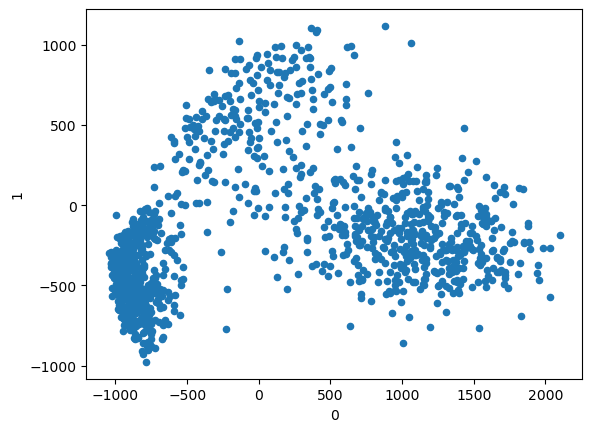

In [6]:
xs = points[0]
ys = points[1]

points.plot(kind = 'scatter', x = 0, y = 1)

**zadanie 1** Ile dostrzegasz rozdzielnych grup punktów na powyższym wykresie?

In [ ]:
# 3 grupy punktów

Podstawowym akgorytmem do klastrowania danych jest $k$-średnich albo k-means, który został omówiony na wykładzie.  Oczywiście biblioteka `sklearn` zawiera implementację tego algorytmu.

**zadanie 2** Wczytaj z biblioteki `sklearn.cluster` klasę `KMeans`.

In [7]:
from sklearn.cluster import KMeans

Algorytm k-means  wymaga podania oczekiwanej liczby klas, dlatego podczas tworzenia obiektu `KMeans` musimy podać parametr `n_clusters`. W poniższym przykładzie ustawiamy powyższy parametr na 3.

In [8]:
kmeans = KMeans(n_clusters = 3)

**zadanie 3** Wywołaj metodę `fit` na obiekcie `kmeans` i jako parametr przekaż zmienną `points`. W taki sposób wytrenujesz model.

In [9]:
kmeans.fit(points)

KMeans(n_clusters=3)

**zadanie 4** Mając wytrenowany model k-średnich, możemy wyznaczyć klaster, do którego został przydzielony każdy z punktów. Służy do tego komenda *predict*. Wywołaj tę komendę na zmiennej *points* i zapisz wynik do zmiennej *clusters*.

In [10]:
clusters = kmeans.predict(points)

Wyświetlmy, w jaki sposób model podzielił punkty:

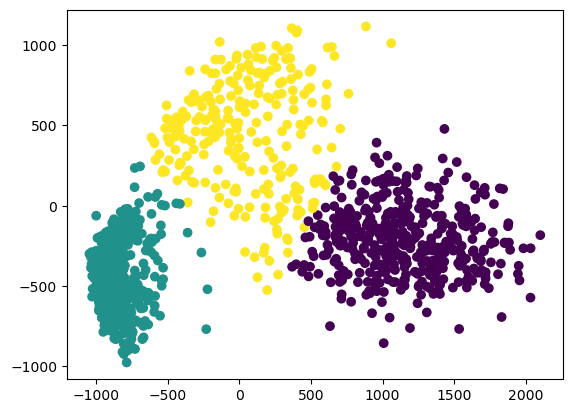

In [11]:
plt.scatter(x = points[0], y = points[1], c = clusters)
plt.show()

Informacje o centroidach są przechowywwane w atrybucie `cluster_centers_`:

In [12]:
for idx, centroid in enumerate(kmeans.cluster_centers_):
    print("Claster ID: {}\tX: {}\tY:{}".format(idx, centroid[0], centroid[1]))

Claster ID: 0	X: 1157.3849081349176	Y:-212.0160609571531
Claster ID: 1	X: -844.3076877296984	Y:-450.07153180895205
Claster ID: 2	X: 58.93213533480311	Y:447.0059355970674


**zadanie 5** Sprawdź, w jaki sposób podzieli zbiór punktów model k-średnich, jeżeli ustawimy liczbę klastrów na 2 i 4.

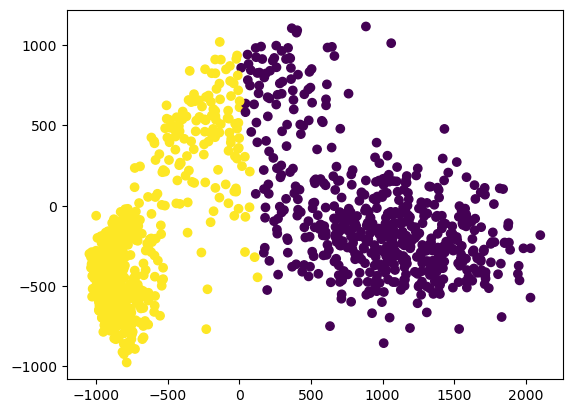

In [13]:
# 2 klastry
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(points)
clusters2 = kmeans2.predict(points)
plt.scatter(x = points[0], y = points[1], c = clusters2)
plt.show()

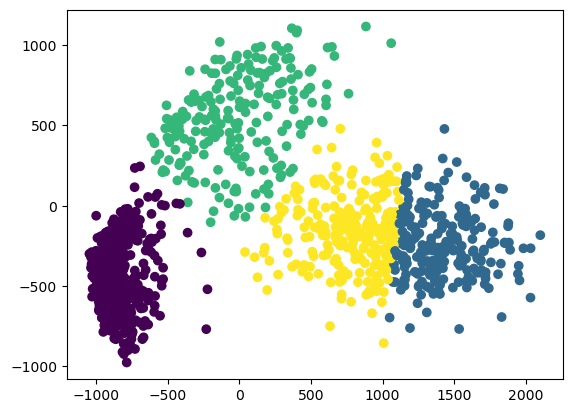

In [14]:
# 4 klastry
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(points)
clusters4 = kmeans4.predict(points)
plt.scatter(x = points[0], y = points[1], c = clusters4)
plt.show()

Algorytm k-średnich minimalizuje sumę odległości do najbliżsego centroidu, co możemy traktować jako funkcje kosztu i wykorzystać to porównania pomiędzy modelami z różnymi liczbami klastrów.

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


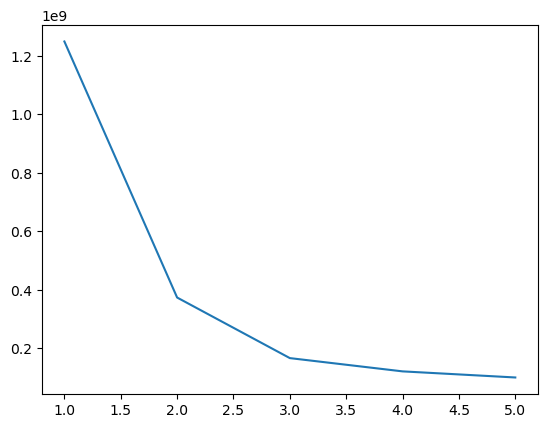

In [15]:
n_clusters = [1, 2, 3, 4, 5]
inertias = []

for n_cluster in n_clusters:
    model = KMeans(n_clusters = n_cluster)
    model.fit(points)
    inertias.append(model.inertia_)

plt.plot(n_clusters, inertias)
plt.show()

Powyższy wykres przedstawia zależność pomiędzy liczbą klastrów, a funkcją kosztu. Można łatwo zauważyć, powyżej 3 klastrów zależność na wygładza się. Stąd, liczba 3 wydaje się być najlepszym wyborem.

Drugim popularnym algorytmem jest DB-SCAN, który nie wymaga `a priori` podania liczby klastrów, którą sam ją wyznacza. Ponadto, cechą tego modelu jest możliwość pominięcia niektórych punktów, które są oddalone od skupisk.

In [16]:
from sklearn.cluster import DBSCAN

Model DB-SCAN przyjmuje dwa parametry: eps - odległość pomiędzy punktami i minimalną liczbę punktów potrzebną do utworzenia klastra.

In [17]:
db = DBSCAN(eps = 130, min_samples = 10)
labels = db.fit_predict(points)
labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

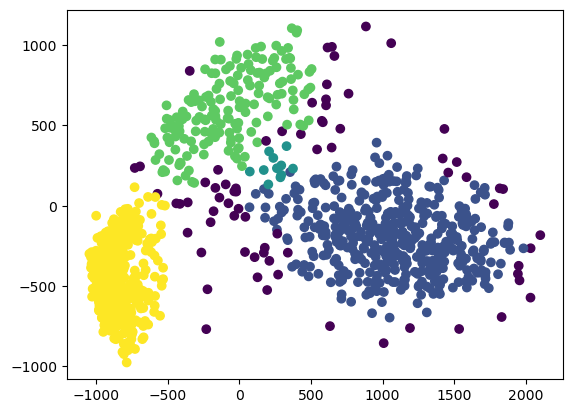

In [18]:
plt.scatter(x = points[0], y = points[1], c = labels)
plt.show()

**zadanie 6** Przeskaluj dane, tak aby miały rozkład standardowy (średnia = 0 , std = 1). I uruchom model SB-SCAN i k-średnich. Czy normalizacja zmieniła coś?

In [19]:
# Dane przed skalowaniem
points.describe()

,0,1
count,1200.000000,1200.000000
mean,75.237773,-175.542581
std,929.878586,419.815724
min,-1045.524369,-977.397408
25%,-832.377477,-474.994279
50%,-75.089840,-260.627020
75%,964.912212,-2.639524
max,2100.238837,1117.317473


In [20]:
from sklearn.preprocessing import StandardScaler

# Skalowanie:
scaler = StandardScaler()
scaler.fit(points)
points_scaled = scaler.transform(points)

# Zamiana na df:
points_scaled = pd.DataFrame(points_scaled)

In [21]:
# Dane po skalowaniu
points_scaled.describe()

,0,1
count,1.200000e+03,1.200000e+03
mean,6.999031e-17,2.011354e-16
std,1.000417e+00,1.000417e+00
min,-1.205780e+00,-1.910813e+00
25%,-9.764647e-01,-7.135906e-01
50%,-1.617311e-01,-2.027554e-01
75%,9.571630e-01,4.120264e-01
max,2.178613e+00,3.080873e+00


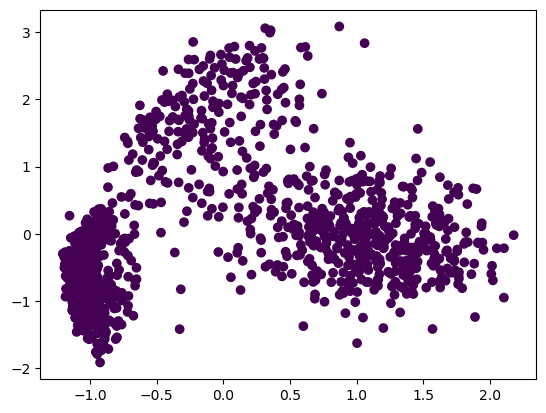

In [22]:
# DBSCAN dla początkowych parametrów >> jeden klaster
db = DBSCAN(eps = 130, min_samples = 10)
labels_scaled = db.fit_predict(points_scaled)
plt.scatter(x = points_scaled[0], y = points_scaled[1], c = labels_scaled)
plt.show()

In [34]:
# metoda NearestNeighbors, żeby znaleźć optymalną wartość eps i min_samples dla przeskalowanych danych:
# https://www.kaggle.com/code/tanmaymane18/nearestneighbors-to-find-optimal-eps-in-dbscan

from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors = 21).fit(points_scaled)
distances, indices = nn.kneighbors(points_scaled)

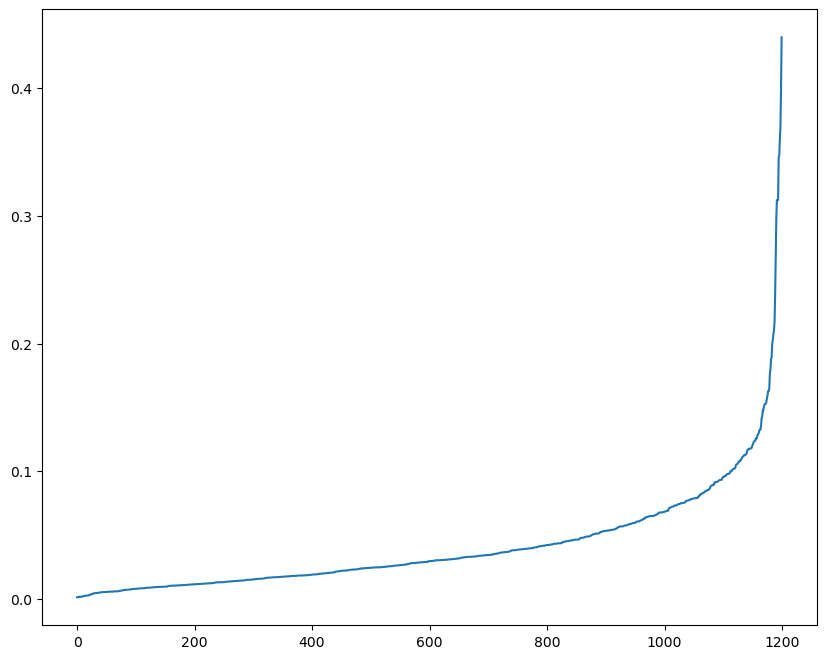

In [35]:
import numpy as np

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

# optymalny zakres eps: 0.05 - 0.3 ('elbow chart')

In [36]:
min_samples = range(5,25)
eps = np.arange(0.1, 0.3, 0.01) 

In [37]:
from sklearn.metrics import silhouette_score

output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(points_scaled).labels_
        score = silhouette_score(points_scaled, labels)
        output.append((ms, ep, score))

In [38]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.5730314689424095
min_samples: 17
eps: 0.2899999999999999


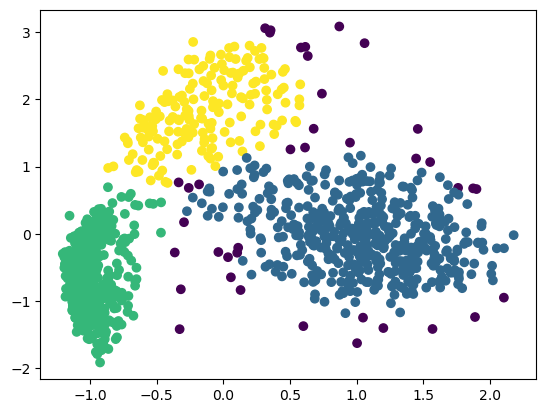

In [39]:
# DBSCAN dla eps = 0.29 i min_samples = 17
db = DBSCAN(eps = 0.29, min_samples = 17)
labels_scaled = db.fit_predict(points_scaled)
plt.scatter(x = points_scaled[0], y = points_scaled[1], c = labels_scaled)
plt.show()

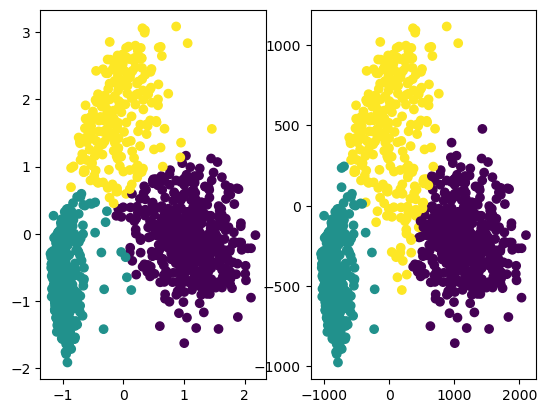

In [40]:
# k-means dla przeskalowanych danych
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(points_scaled)
clusters3 = kmeans3.predict(points_scaled)


fig, (plt1, plt2) = plt.subplots(1,2)

# Wykres 1 - przeskalowane dane
plt1.scatter(x = points_scaled[0], y = points_scaled[1], c = clusters3)
# Wykres 2 - dane bez skalowania
plt2.scatter(x = points[0], y = points[1], c = clusters)

plt.show()

### Redukcja wymiaru

Jedną z wad algorytmu k-średnich jest czas trenowania, który rośnie z wymiarem danych, jak ich z liczbą przykładów trenujących. Podstawową techniką w takim przypadku jest zmniejszenie wymiarowości danych. Najprostszą techniką jest [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis).

In [41]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

Ściągnijmy zbiór dancych MNIST, który pojawił się na naszych zajęciach.

In [42]:
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float64')
y = mnist.target

Podczas tworzeania PCA, możemy podać wyjsciową liczbę wymiarów (argument *n_components*). 

In [43]:
pca = PCA(n_components = 10)
pca.fit(X)

PCA(n_components=10)

In [44]:
mnist_pca = pca.transform(X)

**zadanie 7** Wytrenuj K-Means na wyjściu z PCA. Ustaw liczbę klastrów na 10. Ponadto zapisz do `mnist_clusters` numer klastra, do którego został on przydzielony.

In [45]:
kmeans10 = KMeans(n_clusters = 10)
kmeans10.fit(mnist_pca)
mnist_clusters = kmeans10.predict(mnist_pca)

In [46]:
mnist_clusters

array([6, 8, 5, ..., 3, 1, 4])

**zadanie 8** Zmienna `y` zawiera informację o prawidłowych oznaczeniach: tj. liczby od 0 do 9 (włącznie). Dla każdej cyfry *i* znajdz klaster *j*, w którym znajduje się najwięcej cyfr *i*.

In [47]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [48]:
# Zamiana wartości w mnist_cluster na kategorie (żeby pasowało do kategorii w y [str])
import numpy as np
str_mnist_clusters = np.array([str(i) for i in mnist_clusters])

In [49]:
str_mnist_clusters

array(['6', '8', '5', ..., '3', '1', '4'], dtype='<U1')

In [50]:
# Confussion matrix > który klaster został najczęściej wybrany dla danej liczby (etykieta z y)
from sklearn.metrics import confusion_matrix
cnf_mtrx_array = confusion_matrix(y, str_mnist_clusters)
cnf_mtrx_array

array([[  20,   21,  226,   10,  187,   46,  110, 3675, 2578,   30],
       [   8, 3575,    6,    7,    6,    4,   11,    0,    0, 4260],
       [4765,  309,  397,   74,  254,  203,  179,   32,  166,  611],
       [ 236,  116, 4514,   43,   36,  199, 1125,   15,  210,  647],
       [  36,  371,    0, 2047,  275, 3736,   16,   16,   17,  310],
       [  14,  885, 1914,  291,   79,  457, 1414,   87,  667,  505],
       [ 220,  206,   38,    2, 5286,  107,   57,   90,  243,  627],
       [  54,  296,    4, 4187,    4, 2084,   12,   19,   15,  618],
       [  93,  625, 1172,  263,   67,  210, 3747,   47,   67,  534],
       [  20,  149,   85, 2651,   14, 3371,   95,   53,   23,  497]],
      dtype=int64)

In [51]:
# Zamiana confusion matrix na dataFrame > poziomo numery klastrów, pionowo etykiety z y
conf_mtrx_df = pd.DataFrame(cnf_mtrx_array,
                            columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
conf_mtrx_df

,0,1,2,3,4,5,6,7,8,9
0,20,21,226,10,187,46,110,3675,2578,30
1,8,3575,6,7,6,4,11,0,0,4260
2,4765,309,397,74,254,203,179,32,166,611
3,236,116,4514,43,36,199,1125,15,210,647
4,36,371,0,2047,275,3736,16,16,17,310
5,14,885,1914,291,79,457,1414,87,667,505
6,220,206,38,2,5286,107,57,90,243,627
7,54,296,4,4187,4,2084,12,19,15,618
8,93,625,1172,263,67,210,3747,47,67,534
9,20,149,85,2651,14,3371,95,53,23,497


In [52]:
# Numery klastrów przyporządkowane do etykiet (niektóre klastry są przypisane dwukrotnie:
# liczba 4 jest często mylona z 9, więc obie liczby mają przypisany ten sam klaster
conf_mtrx_df.idxmax(axis = 1)

0    7
1    9
2    0
3    2
4    5
5    2
6    4
7    3
8    6
9    5
dtype: object

**zadanie 9** mając wyznaczone klasy z poprzedniego zadania, sumuj liczbę elementów w najpopularniejszym klastrze.

In [53]:
# Suma elementów dla wszystkich klastrów:
clstrs = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
clstrs_elmnts = []

for item in clstrs:
    clstrs_elmnts.append(conf_mtrx_df[item].sum())
    
d = {'Cluster':clstrs, 'Cluster_elements':clstrs_elmnts}

df = pd.DataFrame(d)
df = df.set_index('Cluster')

df.sort_values('Cluster_elements', ascending = False)

,Cluster_elements
Cluster,
5,10417
3,9575
9,8639
2,8356
6,6766
1,6553
4,6208
0,5466
7,4034


In [54]:
# Klaster z największą liczbą elementów:
df.sort_values('Cluster_elements', ascending = False).head(1)

,Cluster_elements
Cluster,
5,10417


**zadanie 10** Oblicz accuracy biorąc wynik z poprzedniego zadania.

In [ ]:
# Przypisujemy etykietę (liczbę) do klastra na podstawie najczęściej wskazanej etykiety,
# następnie liczymy stosunek najczęściej wskazanej klasy do całkowitej liczby elementów w klastrze.

In [55]:
# Accuracy liczona dla każdego klastra:
clstrs = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
clstrs_acc = []

conf_mtrx_df['0'].max()

for item in clstrs:
    clstrs_acc.append(conf_mtrx_df[item].max()/conf_mtrx_df[item].sum())
    
d2 = {'Cluster':clstrs, 'Cluster_accuracy':clstrs_acc}

df2 = pd.DataFrame(d2)
df2 = df2.set_index('Cluster')

df2.sort_values('Cluster_accuracy', ascending = False)

,Cluster_accuracy
Cluster,
7,0.911006
0,0.871753
4,0.851482
8,0.646764
6,0.553798
1,0.545552
2,0.540211
9,0.493113
3,0.437285


In [58]:
# Accuracy dla całego zbioru danych:
clstrs = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# Lista z maksymalnymi wartościami przypisanymi do danej etykiety (per kluster)
clstrs_max = []

for item in clstrs:
    clstrs_max.append(conf_mtrx_df[item].max())

# Accuracy:
sum(clstrs_max)/df['Cluster_elements'].sum()

0.5760428571428572

**zadanie 11** Spróbuj podwyższych wynik, stosując np. normalizację lub zmieniając parametry.

In [59]:
mn_df = pd.DataFrame(mnist_pca)
mn_df.head()

,0,1,2,3,4,5,6,7,8,9
0,122.255262,-316.233845,-51.132241,-556.898066,-49.210287,-217.075120,233.725905,189.005185,-358.127772,203.676247
1,1010.493996,-289.963637,576.121117,-485.083134,-841.478284,-145.461347,-48.341872,-102.378186,34.107380,150.966677
2,-58.995936,393.697451,-161.998716,529.220654,-313.158679,8.962566,-860.970113,374.544196,-77.533780,-192.536687
3,-796.965023,-607.421245,295.522869,109.112876,25.665041,697.861278,-474.531791,-99.963706,298.177274,4.650776
4,-391.318911,729.804166,13.906514,-242.894303,98.772836,35.920178,-87.422432,-415.683604,200.699120,105.884489


In [86]:
# Normalize dataset
from sklearn import preprocessing

# Normalize data accross columns (axis = 0)
scaler = preprocessing.MinMaxScaler()
names = mn_df.columns
d = scaler.fit_transform(mn_df)
mn_df_norm = pd.DataFrame(d, columns=names)

mn_df_norm.head()

,0,1,2,3,4,5,6,7,8,9
0,0.347289,0.384551,0.474071,0.311366,0.464766,0.407503,0.565904,0.571582,0.282046,0.593977
1,0.603625,0.393631,0.690079,0.334460,0.169842,0.435932,0.447690,0.446896,0.432649,0.567878
2,0.294982,0.629922,0.435891,0.660634,0.366511,0.497235,0.107121,0.650976,0.389783,0.397796
3,0.082011,0.283910,0.593449,0.525538,0.492639,0.770714,0.269076,0.447930,0.534042,0.495432
4,0.199077,0.746089,0.496468,0.412342,0.519854,0.507937,0.431312,0.312830,0.496614,0.545556


In [87]:
kmeans10 = KMeans(n_clusters = 10)
kmeans10.fit(mn_df_norm)
mnist_clusters_norm = kmeans10.predict(mn_df_norm)

mnist_clusters_norm

array([6, 7, 0, ..., 4, 5, 9])

In [88]:
str_mnist_clusters_norm = np.array([str(i) for i in mnist_clusters_norm])
str_mnist_clusters_norm

array(['6', '7', '0', ..., '4', '5', '9'], dtype='<U1')

In [89]:
# Confusion matrix dla znormalizowanych danych
cnf_mtrx_array_norm = confusion_matrix(y, str_mnist_clusters_norm)

conf_mtrx_df_norm = pd.DataFrame(cnf_mtrx_array_norm,
                            columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
conf_mtrx_df_norm

,0,1,2,3,4,5,6,7,8,9
0,31,302,15,21,8,2224,54,3991,12,245
1,5,2,10,4390,9,2,5,0,3446,8
2,241,262,4768,620,66,274,226,33,333,167
3,213,4385,301,556,33,579,935,7,101,31
4,3837,21,21,198,2081,61,21,18,331,235
5,421,1842,8,417,166,1415,1243,59,666,76
6,119,42,223,546,9,732,30,103,101,4971
7,2397,23,77,557,3910,14,15,26,268,6
8,124,951,92,469,266,122,4028,26,665,82
9,3601,94,25,410,2448,15,183,61,111,10


In [90]:
# Accuracy dla całego zbioru danych - dane znormalizowane

clstrs = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
clstrs_max_norm = []

for item in clstrs:
    clstrs_max_norm.append(conf_mtrx_df_norm[item].max())

# Accuracy:
sum(clstrs_max_norm)/conf_mtrx_df_norm.sum().sum()

0.5707142857142857

**Gratuluję!**